#Import libraries

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from matplotlib.pyplot import subplots
from sklearn.metrics import mean_squared_error
from statsmodels.formula.api import ols
import statsmodels.api as sm

#Dataset & Analysis

In [12]:
#load dataset
data= pd.read_csv('Boston.csv')
#show first 10 samples
data.head(10)

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2
5,6,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,5.21,28.7
6,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,12.43,22.9
7,8,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,19.15,27.1
8,9,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,29.93,16.5
9,10,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,17.10,18.9


In [13]:
#remove columns:
data.drop(['Unnamed: 0'], axis=1, inplace=True)
data.head(10)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,17.10,18.9


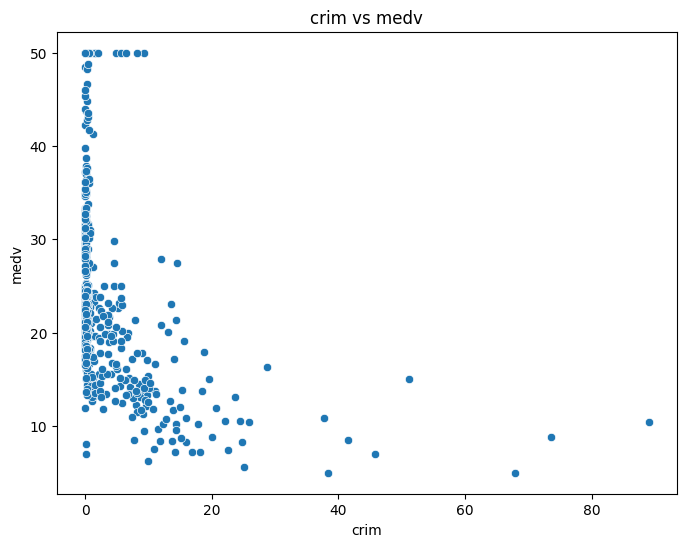

In [14]:
def analyze_column(data, column, target_column):
    """Analyze a single column against the target."""
    # Scatter plot
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=data, x=column, y=target_column)
    plt.title(f'{column} vs {target_column}')
    plt.xlabel(column)
    plt.ylabel(target_column)
    plt.show()

analyze_column(data, 'crim', 'medv')

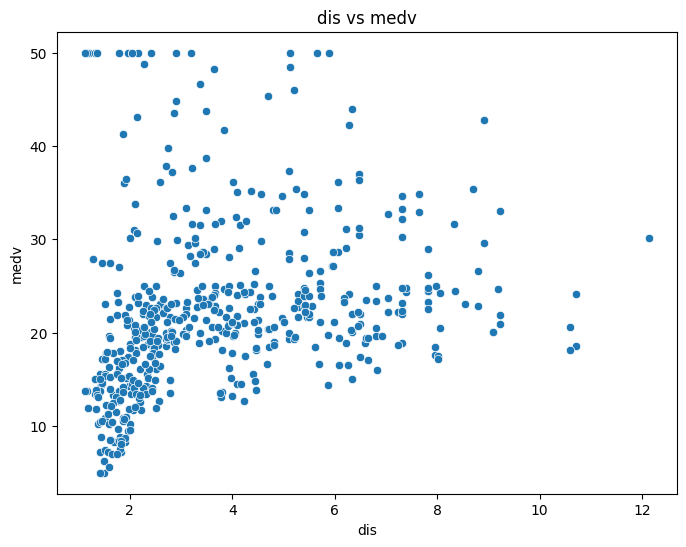

In [ ]:
analyze_column(data, 'dis', 'medv')

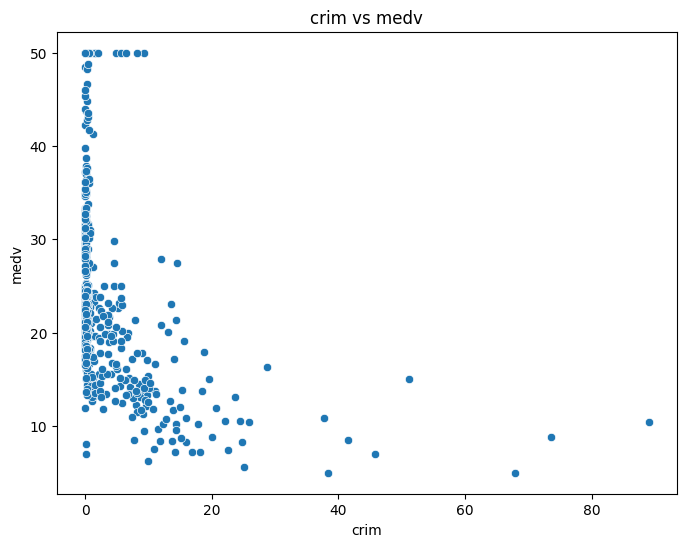

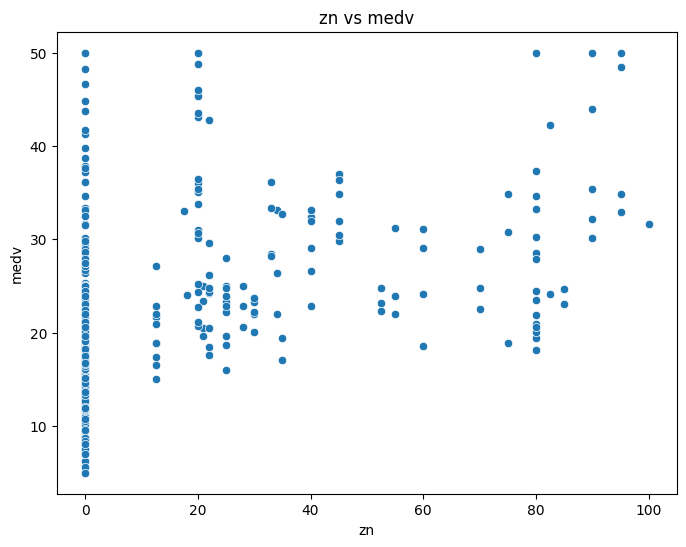

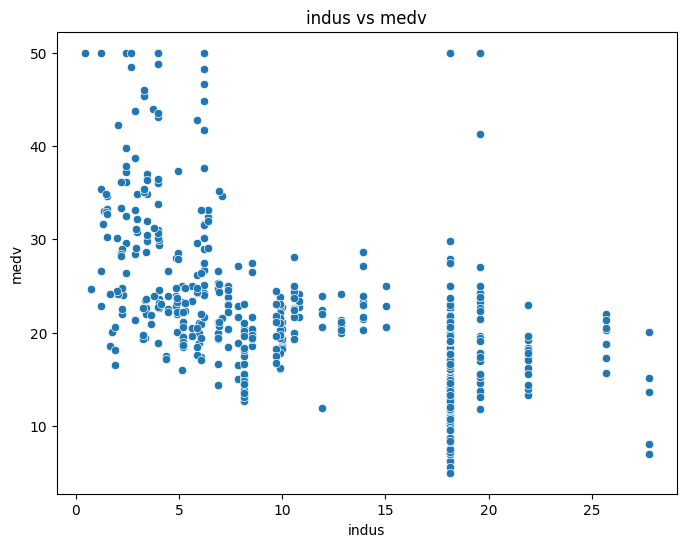

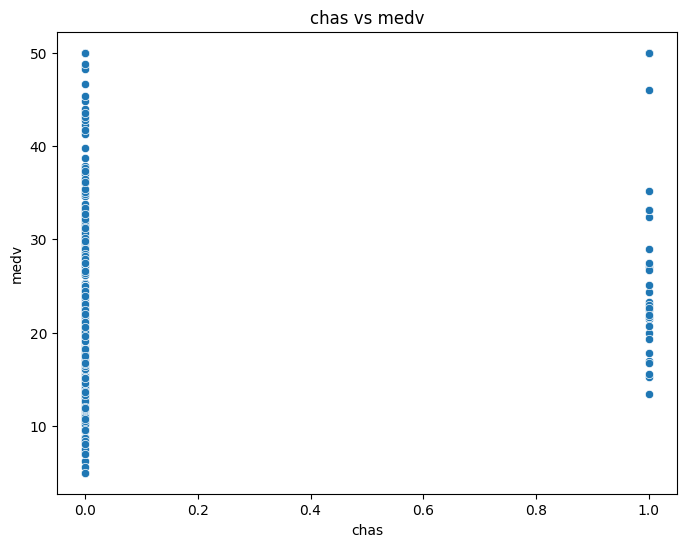

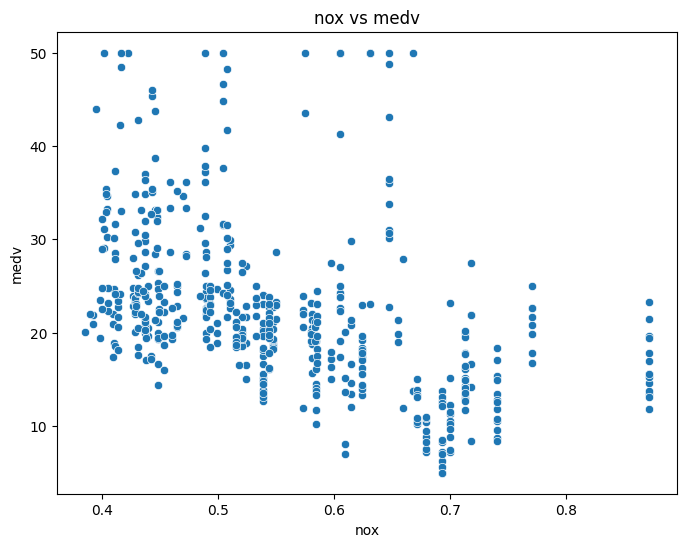

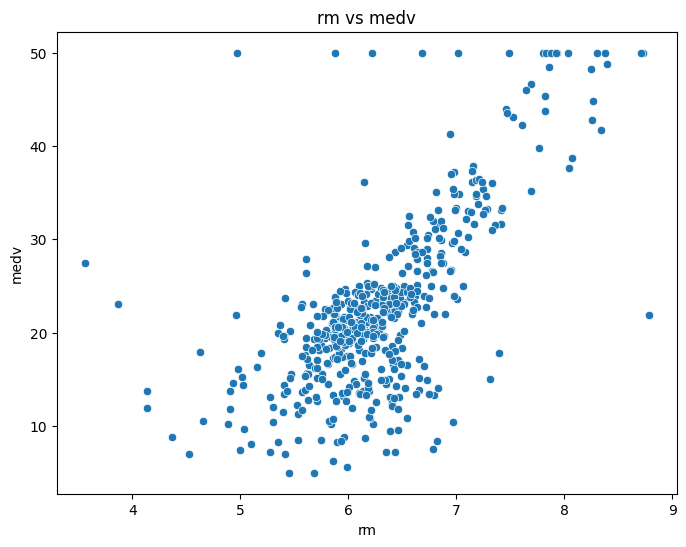

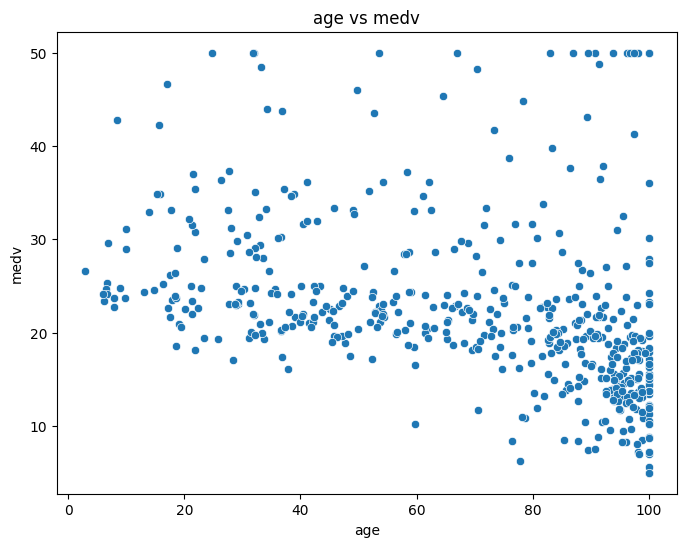

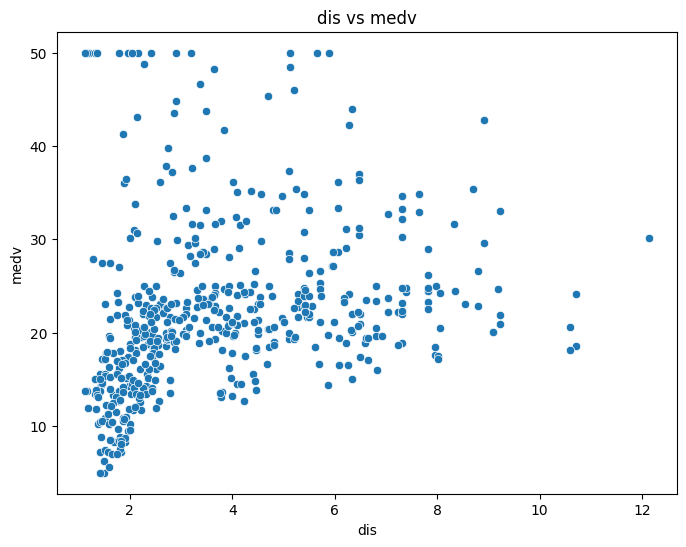

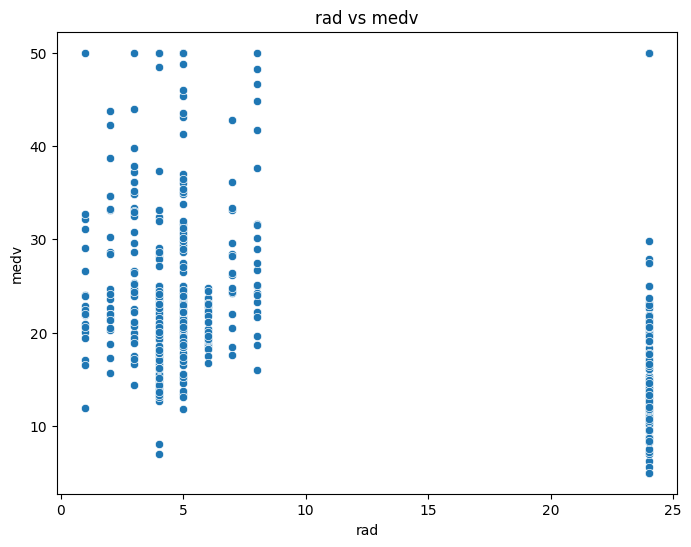

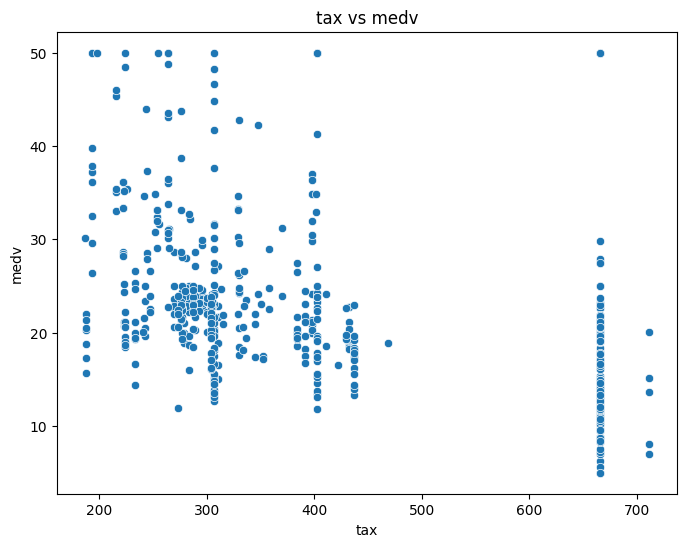

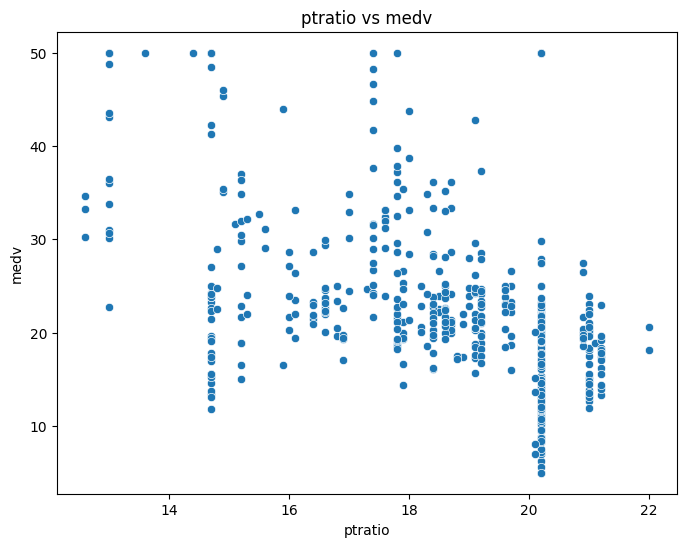

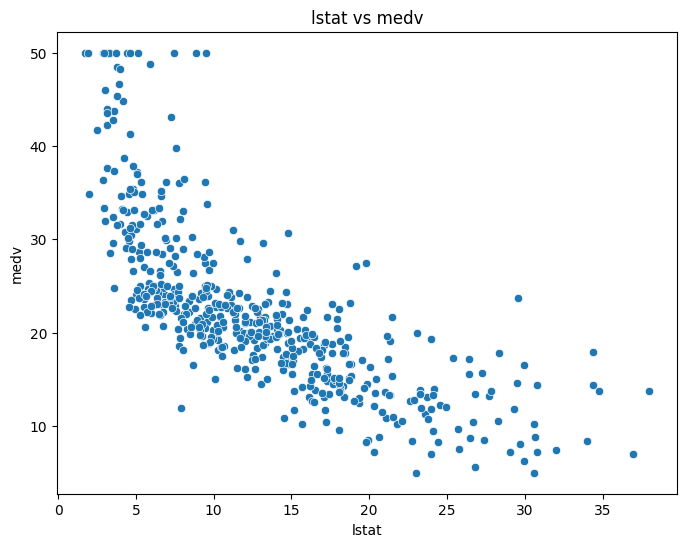

In [15]:
# Analyze all predicters against Y

def analyze_all_columns(data, target_column):
    """Analyze all columns against the target."""
    feature_columns = [col for col in data.columns if col != target_column]
    for column in feature_columns:
      analyze_column(data, column, target_column)

analyze_all_columns(data,'medv')

In [22]:
def residuals_plot(model):
  ax = subplots(figsize=(8,8))[1]
  ax.scatter(model.fittedvalues, model.resid)
  ax.set_xlabel('Fitted value')
  ax.set_ylabel('Residual')
  ax.axhline(0, c='k', ls='--');

#simple linear Regression

In [18]:
simple_lr= ols('medv~lstat',data=data).fit()
print (simple_lr.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Thu, 13 Jun 2024   Prob (F-statistic):           5.08e-88
Time:                        15:27:42   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.5538      0.563     61.415      0.0

In [20]:
# prediction
y_hat= simple_lr.predict(data['lstat'])
print(y_hat)


0      29.822595
1      25.870390
2      30.725142
3      31.760696
4      29.490078
         ...    
501    25.366864
502    25.927393
503    29.195563
504    28.397521
505    27.067452
Length: 506, dtype: float64


In [21]:
print('Mean Squared Error: ',mean_squared_error(data['medv'],y_hat))

Mean Squared Error:  38.48296722989414


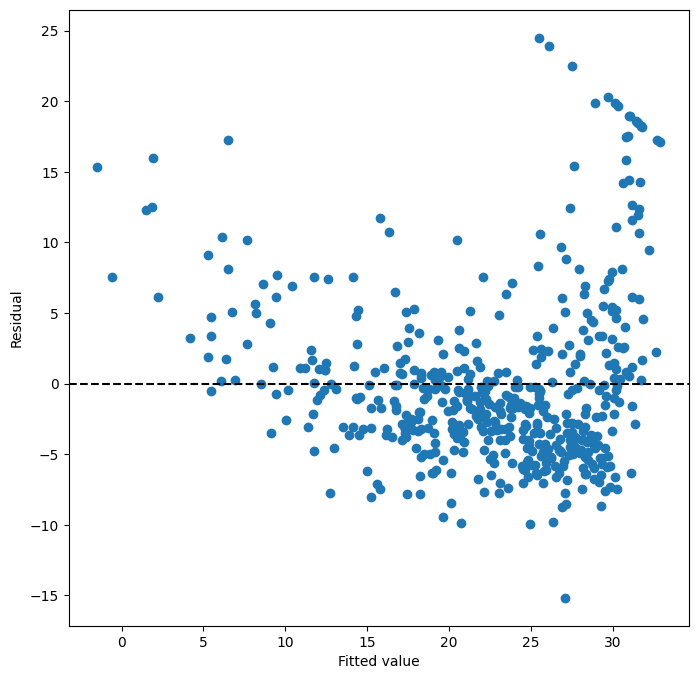

In [23]:
residuals_plot(simple_lr)

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Thu, 13 Jun 2024   Prob (F-statistic):           1.21e-08
Time:                        15:37:20   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     18.3901      0.817     22.499      0.0

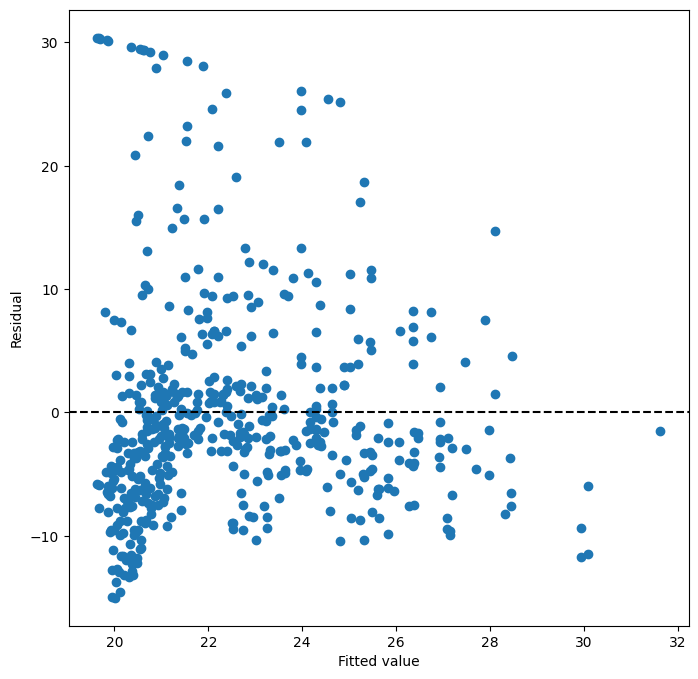

In [25]:
dis_lr= ols('medv~dis',data=data).fit()
print (dis_lr.summary())
y_hat= dis_lr.predict(data['dis'])
print(y_hat)
print('Mean Squared Error: ',mean_squared_error(data['medv'],y_hat))
residuals_plot(dis_lr)

## Multiple Linear Regression

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.562
Model:                            OLS   Adj. R-squared:                  0.560
Method:                 Least Squares   F-statistic:                     323.0
Date:                Thu, 13 Jun 2024   Prob (F-statistic):           5.94e-91
Time:                        15:48:51   Log-Likelihood:                -1631.2
No. Observations:                 506   AIC:                             3268.
Df Residuals:                     503   BIC:                             3281.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     38.3775      1.004     38.219      0.0

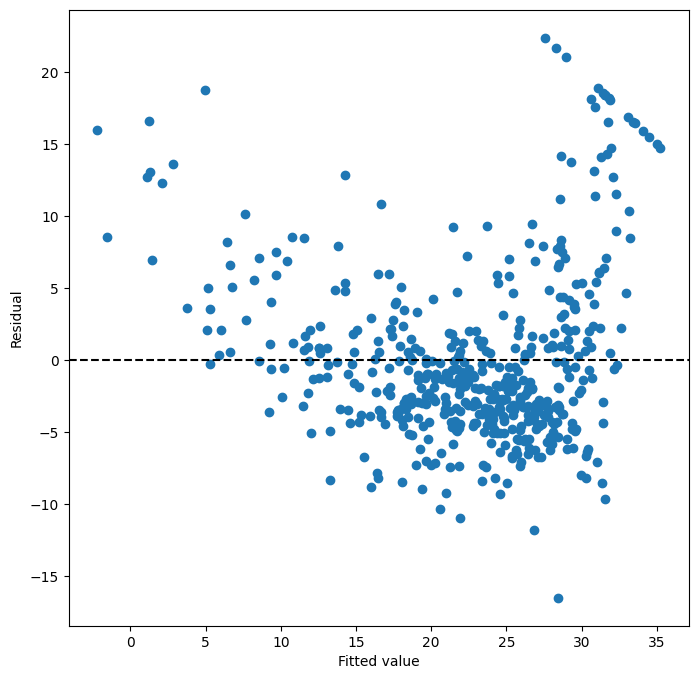

In [27]:
multiple_lr= ols('medv~lstat+dis',data=data).fit()
print (multiple_lr.summary())
y_hat= multiple_lr.predict(data[['lstat','dis']])
print(y_hat)
print('Mean Squared Error: ',mean_squared_error(data['medv'],y_hat))
residuals_plot(multiple_lr)

#Train with all variables

In [28]:
#train with all variables
data= sm.add_constant(data)
data.head(5)

,const,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,1.0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,1.0,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,1.0,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,1.0,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,1.0,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [32]:
x= data.drop(['medv'],axis=1)
x.head()

,const,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat
0,1.0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98
1,1.0,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14
2,1.0,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03
3,1.0,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94
4,1.0,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33


In [ ]:
y=data.medv


                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     113.5
Date:                Thu, 13 Jun 2024   Prob (F-statistic):          2.23e-133
Time:                        16:10:20   Log-Likelihood:                -1504.9
No. Observations:                 506   AIC:                             3036.
Df Residuals:                     493   BIC:                             3091.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         41.6173      4.936      8.431      0.0

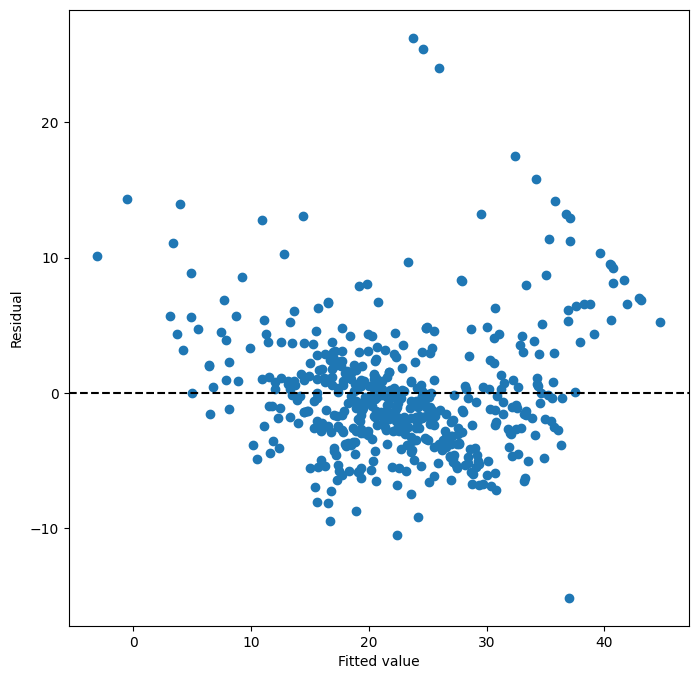

In [34]:
multiple_lr= sm.OLS(y,x).fit()
print (multiple_lr.summary())
y_hat= multiple_lr.predict(x)
print(y_hat)
print('Mean Squared Error: ',mean_squared_error(y,y_hat))
residuals_plot(multiple_lr)

#Interactions

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.563
Model:                            OLS   Adj. R-squared:                  0.560
Method:                 Least Squares   F-statistic:                     215.4
Date:                Thu, 13 Jun 2024   Prob (F-statistic):           8.97e-90
Time:                        16:13:43   Log-Likelihood:                -1630.9
No. Observations:                 506   AIC:                             3270.
Df Residuals:                     502   BIC:                             3287.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     37.8743      1.198     31.621      0.0

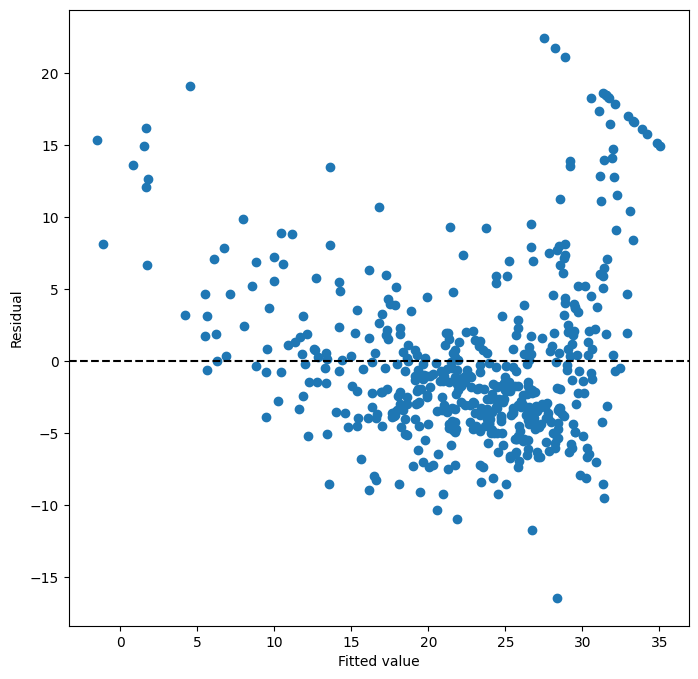

In [37]:
interaction= ols('medv~ dis*lstat',data=data).fit()
print (interaction.summary())
y_hat= interaction.predict(data[['lstat','dis']])
print(y_hat)
print('Mean Squared Error: ',mean_squared_error(data['medv'],y_hat))
residuals_plot(interaction)

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.192
Model:                            OLS   Adj. R-squared:                  0.187
Method:                 Least Squares   F-statistic:                     39.74
Date:                Thu, 13 Jun 2024   Prob (F-statistic):           4.70e-23
Time:                        16:17:27   Log-Likelihood:                -1786.3
No. Observations:                 506   AIC:                             3581.
Df Residuals:                     502   BIC:                             3598.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.2870      7.885      4.602      0.0

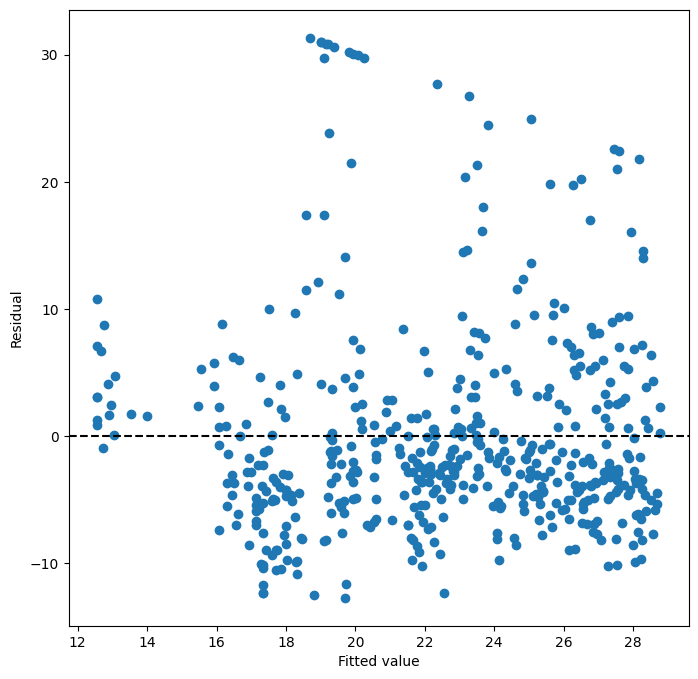

In [42]:
interaction= ols('medv~ age*nox',data=data).fit()
print (interaction.summary())
y_hat= interaction.predict(data[['age','nox']])
print(y_hat)
print('Mean Squared Error: ',mean_squared_error(data['medv'],y_hat))
residuals_plot(interaction)

# Explanation for age and nox
I originaly thought that the age of a house and nitrous oxide would have some sort of intearaction because as industry grows it would encrouch uppon older houses. However from just looking at the p value there is no significant interaction if there ar any what so ever, but if we were to ignore the p value we can see that both age and nox have negative relationships and that the median error is quite high. On top of all that the data has a low R squared value meaning that it isnt very good/ trustworth data.